In [12]:
import numpy as np
import matplotlib.pyplot as plt
from triqs.gf import *
from triqs.gf.descriptors import Function
from triqs.plot.mpl_interface import oplot
import h5
%config InlineBackend.figure_format = 'retina'

AssertionError: Can not subtract two Gf with different mesh

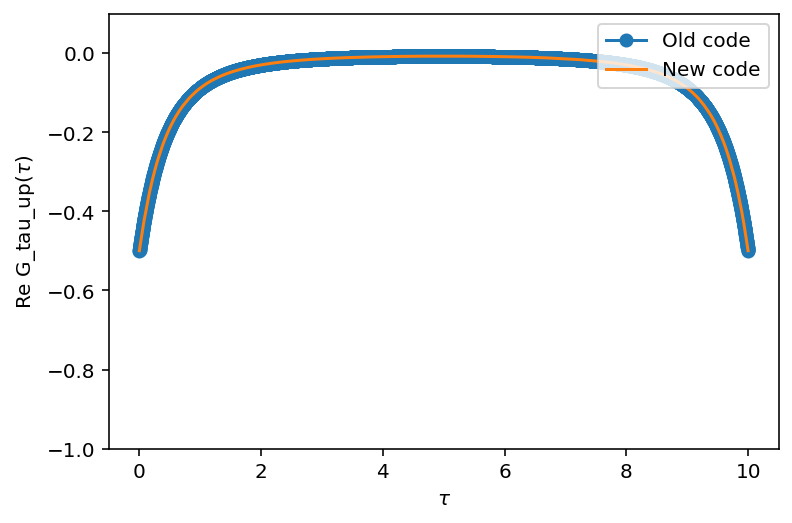

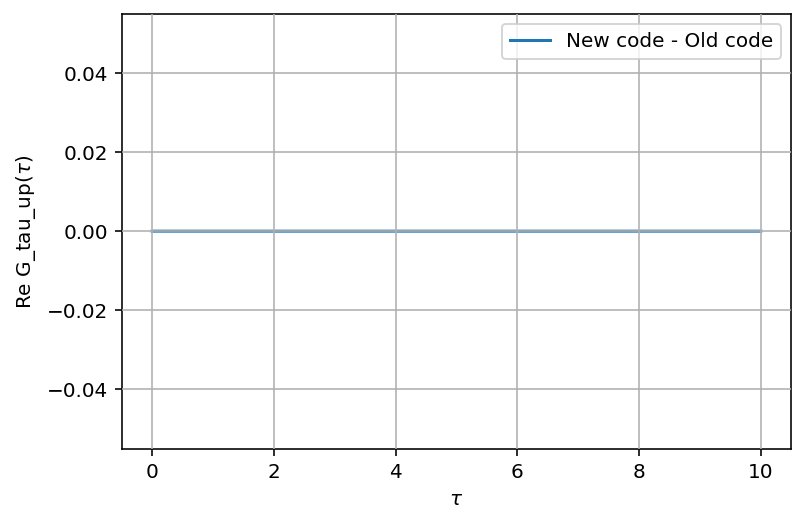

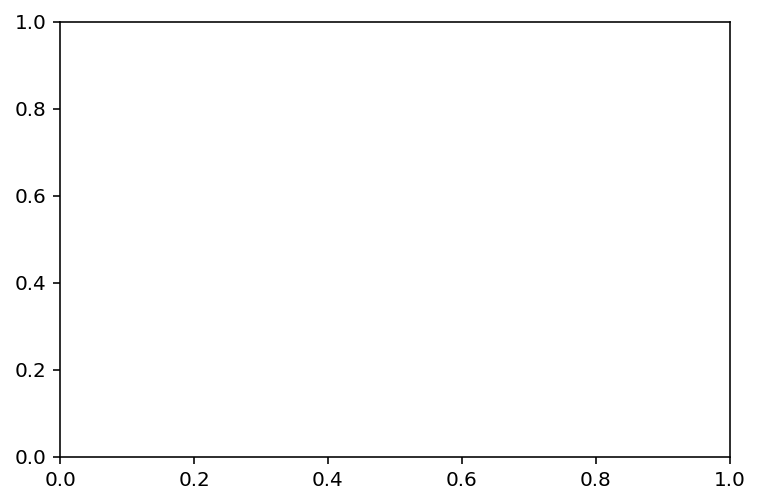

In [13]:
beta = 10
n_tau = 2051

# CTINT
with h5.HDFArchive("/mnt/home/nkavokine/pyscripts/solver-jperp-ctseg-ctint-test/run-ctint-Jperp1-J0.50-beta10.00-U4.00-muS1.00.out.h5", 'r') as Af:
    CTINT_G_iw_up = Af["dmft_loop/i_001/S/G_iw/up"]
    CTINT_G_iw_dn= Af["dmft_loop/i_001/S/G_iw/dn"]

CTINT_G_iw = 0.5*(CTINT_G_iw_up + CTINT_G_iw_dn)
CTINT_G_tau = GfImTime(indices=[0], beta=beta, n_points = n_tau) 
CTINT_G_tau << Fourier(CTINT_G_iw)

# Results
with h5.HDFArchive("test_J_new.h5", 'r') as Af:
    Gnew = Af["G_tau"]
with h5.HDFArchive("test_J_new.h5", 'r') as Af:
    Gold = Af["G_tau"]

GnewS = 0.5*(Gnew['up'].real + Gnew['down'].real)
GoldS = 0.5*(Gold['up'].real + Gold['down'].real)

# Plot
fig, ax = plt.subplots()
oplot(GoldS,'o-',label = "Old code")
oplot(GnewS,label = "New code")
ax.set_ylim([-1,0.1])

"""
fig, ax = plt.subplots()
oplot(Gnew['up'].real-Gnew['down'].real,label = "New: Spin up - Spin down")

fig, ax = plt.subplots()
oplot(Gold['up'].real-Gold['down'].real,label = "Old: Spin up - Spin down")"""

fig, ax = plt.subplots()
oplot(GnewS - GoldS,label = "New code - Old code")
plt.grid()
ax.set_axisbelow(False)
#ax.set_ylim([-0.1,0.1])

fig,ax = plt.subplots()
oplot(GnewS - CTINT_G_tau.real,label = "New code - CTINT")
plt.grid()
ax.set_axisbelow(False)

fig,ax = plt.subplots()
oplot(GoldS - CTINT_G_tau.real,label = "Old code - CTINT")
plt.grid()
ax.set_axisbelow(False)

#fig, ax = plt.subplots(
#oplot(Sold.nn_tau.real, 'o-', label = "Old code")
#oplot(Snew.results.nn_tau.real, label = "New code") 

(-0.5025, -0.48)

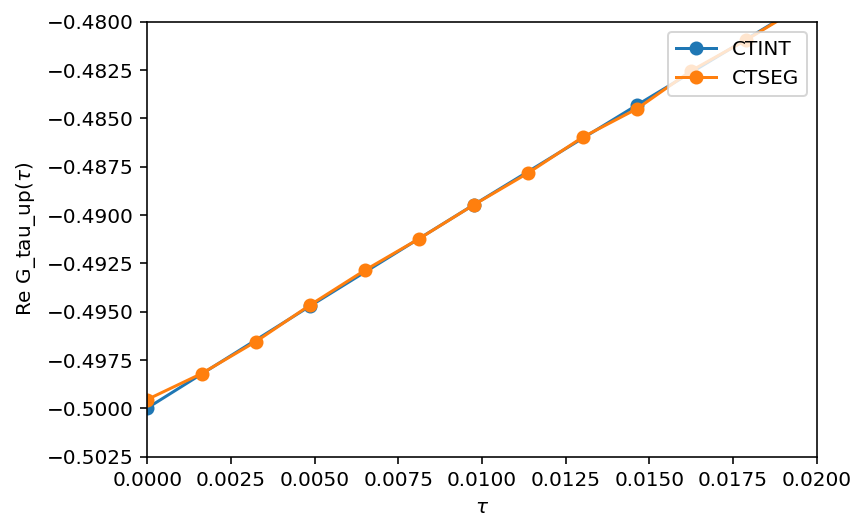

In [14]:
fig,ax = plt.subplots()
oplot(CTINT_G_tau.real,'o-',label="CTINT")
oplot(GnewS,'o-',label="CTSEG")
ax.set_xlim([0,0.02])
ax.set_ylim([-0.5025,-0.48])